# Individual Tree Segmentation Using LidR in Broadleaf forest in AUS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1QoIRe_bq4j2mrRvhvFtyopWrkJh-I42f?usp=sharing)

This notebook shows how to generate individual tree crowns from Airborne LiDAR data with the [lidR](https://github.com/r-lidar/lidR) Package.

Make sure you use GPU runtime for this notebook. For Google Colab, go to `Runtime` -> `Change runtime type` and select `R` as the runtime type.

# 1 install all packages

In [2]:
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "3.1"

$year
[1] "2023"

$month
[1] "06"

$day
[1] "16"

$`svn rev`
[1] "84548"

$language
[1] "R"

$version.string
[1] "R version 4.3.1 (2023-06-16)"

$nickname
[1] "Beagle Scouts"

In [4]:
t1 <-Sys.time()
print(t1)
install.packages("lidR")
print(Sys.time()-t1)

[1] "2023-08-09 03:31:22 UTC"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘wk’, ‘e1071’, ‘htmlwidgets’, ‘s2’, ‘units’, ‘abind’, ‘lwgeom’, ‘classInt’, ‘lazyeval’, ‘raster’, ‘Rcpp’, ‘rgl’, ‘rlas’, ‘sf’, ‘sp’, ‘stars’, ‘terra’, ‘BH’, ‘RcppArmadillo’




Time difference of 19.20751 mins


In [11]:
t1 <-Sys.time()
print(t1)
install.packages("git2r")
print(Sys.time()-t1)

[1] "2023-08-09 04:07:18 UTC"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Time difference of 7.105615 secs


In [74]:
t1 <-Sys.time()
print(t1)
install.packages("future")
print(Sys.time()-t1)
library(future)

[1] "2023-08-09 04:40:00 UTC"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘globals’, ‘listenv’, ‘parallelly’




Time difference of 10.29089 secs


In [6]:
library(raster)

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [7]:
library(lidR)


Attaching package: ‘lidR’


The following objects are masked from ‘package:raster’:

    projection, projection<-




# 2 download sample data

In [36]:
dir.create('/content/ITD')

In [37]:
setwd('/content/ITD')

In [38]:
getwd()

[1] "/content/ITD"

In [39]:
list.dirs()

[1] "."

In [40]:
# Replace the URL with the repository you want to clone
repo_url <- "https://github.com/ruizhuj/Individual_Tree_Delineation_in_Broadleaf_forest"

# Clone the repository
git2r::clone(repo_url, local_path = "Individual_Tree_Delineation_in_Broadleaf_forest")

cloning into 'Individual_Tree_Delineation_in_Broadleaf_forest'...
Receiving objects:   3% (1/28),    9 kb
Receiving objects:  14% (4/28),    9 kb
Receiving objects:  21% (6/28),    9 kb
Receiving objects:  32% (9/28),    9 kb
Receiving objects:  42% (12/28),    9 kb
Receiving objects:  53% (15/28),    9 kb
Receiving objects:  64% (18/28), 16661 kb
Receiving objects:  71% (20/28), 16661 kb
Receiving objects:  82% (23/28), 16661 kb
Receiving objects:  92% (26/28), 16661 kb
Receiving objects: 100% (28/28), 16661 kb, done.


Local:    main /content/ITD/Individual_Tree_Delineation_in_Broadleaf_forest
Remote:   main @ origin (https://github.com/ruizhuj/Individual_Tree_Delineation_in_Broadleaf_forest)
Head:     [b02aeb1] 2023-08-09: Add files via upload

In [41]:
list.files()

[1] "Individual_Tree_Delineation_in_Broadleaf_forest"

In [42]:
setwd('./Individual_Tree_Delineation_in_Broadleaf_forest')

In [43]:
getwd()

[1] "/content/ITD/Individual_Tree_Delineation_in_Broadleaf_forest"

In [44]:
list.files('./data')

[1] "merged.laz"            "Plot1_Valid_Cover.cpg" "Plot1_Valid_Cover.dbf"
[4] "Plot1_Valid_Cover.prj" "Plot1_Valid_Cover.sbn" "Plot1_Valid_Cover.sbx"
[7] "Plot1_Valid_Cover.shp" "Plot1_Valid_Cover.shx"

# 3 check whole las file

In [ ]:
#https://r-lidar.github.io/lidRbook/index.html

In [45]:
laz <- readLAS('./data/merged.laz')

In [46]:
print(laz)

class        : LAS (v1.3 format 1)
memory       : 183.5 Mb 
extent       : 370859.9, 371168.4, 5847678, 5848068 (xmin, xmax, ymin, ymax)
coord. ref.  : GDA94 / MGA zone 55 
area         : 122268 m²
points       : 3.44 million points
density      : 28.1 points/m²
density      : 11.44 pulses/m²


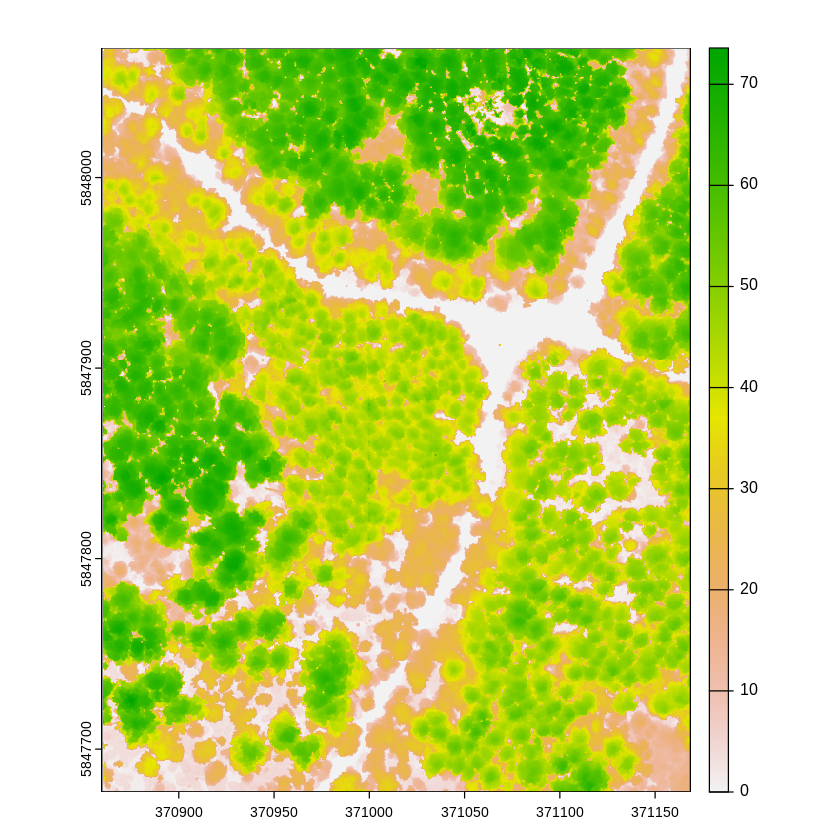

In [47]:
chm <- rasterize_canopy(laz, 0.5, pitfree(subcircle = 0.2))
plot(chm)

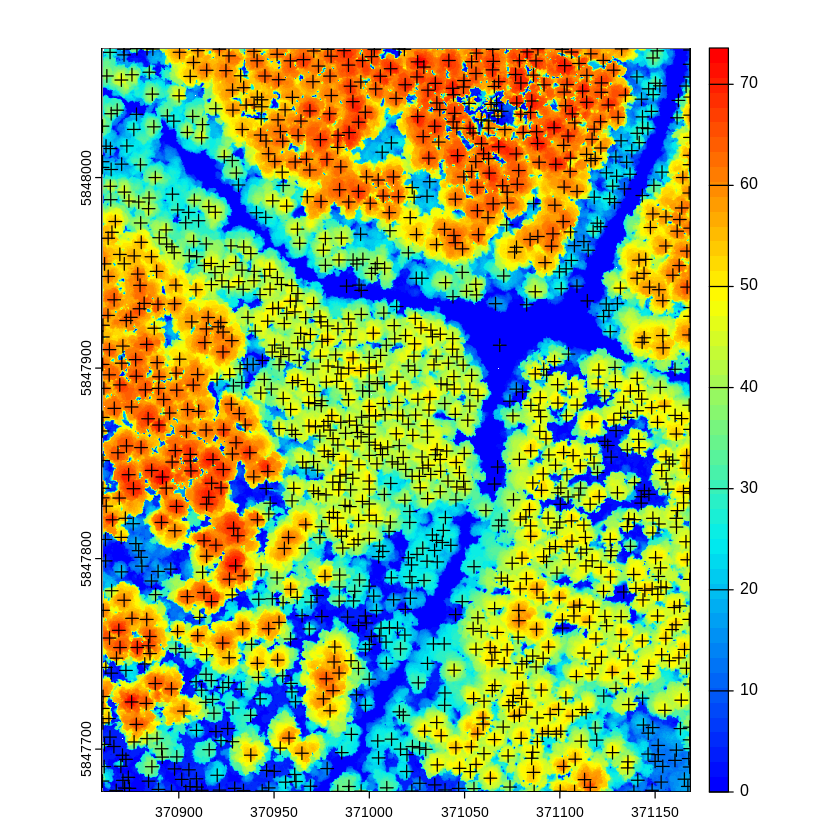

In [48]:
ttops <- locate_trees(laz, lmf(ws = 5))

plot(chm, col = height.colors(50))
plot(sf::st_geometry(ttops), add = TRUE, pch = 3)

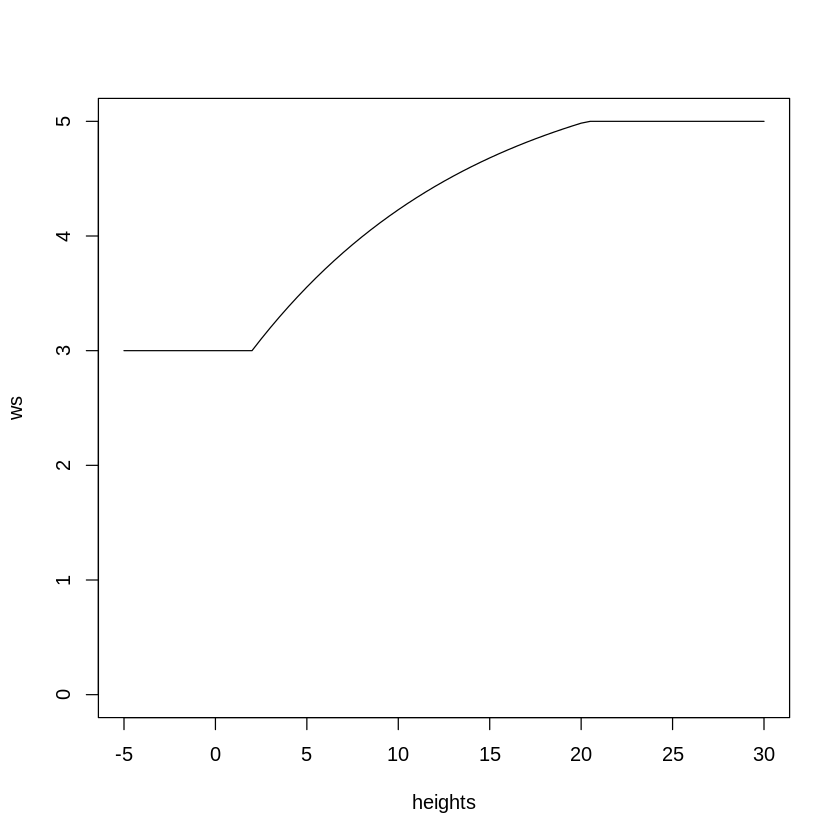

In [49]:
f <- function(x) {
  y <- 2.6 * (-(exp(-0.08*(x-2)) - 1)) + 3
  y[x < 2] <- 3
  y[x > 20] <- 5
  return(y)
}

heights <- seq(-5,30,0.5)
ws <- f(heights)
plot(heights, ws, type = "l",  ylim = c(0,5))

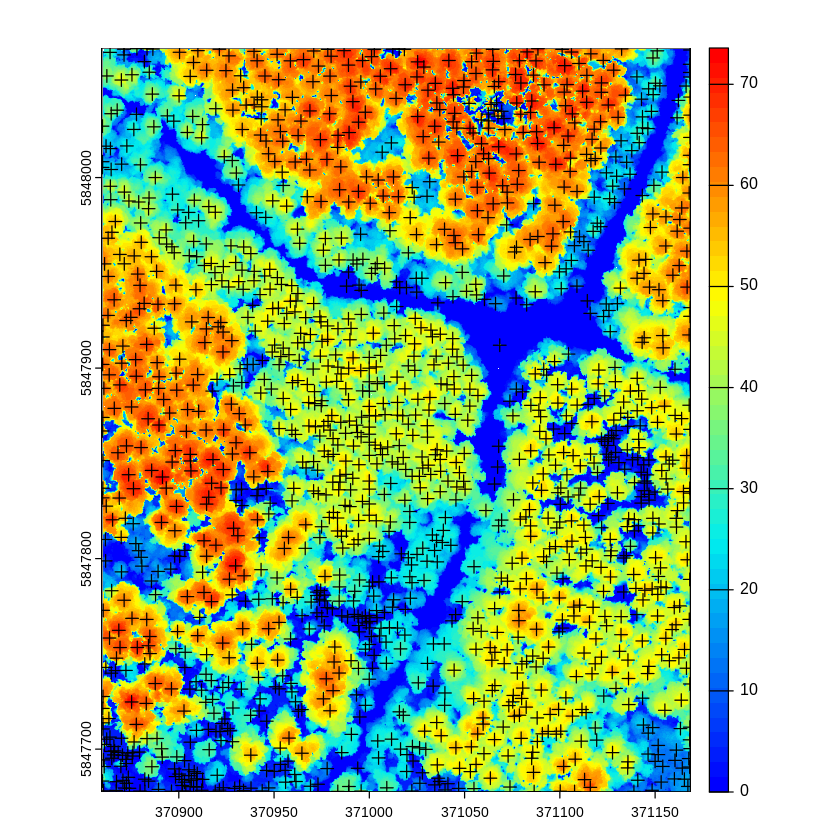

In [50]:
ttops_f <- locate_trees(laz, lmf(f))

plot(chm, col = height.colors(50))
plot(sf::st_geometry(ttops_f), add = TRUE, pch = 3)

# 4 clip las for study plot and run segmentation

In [ ]:
#https://cran.r-project.org/web/packages/lidR/lidR.pdf

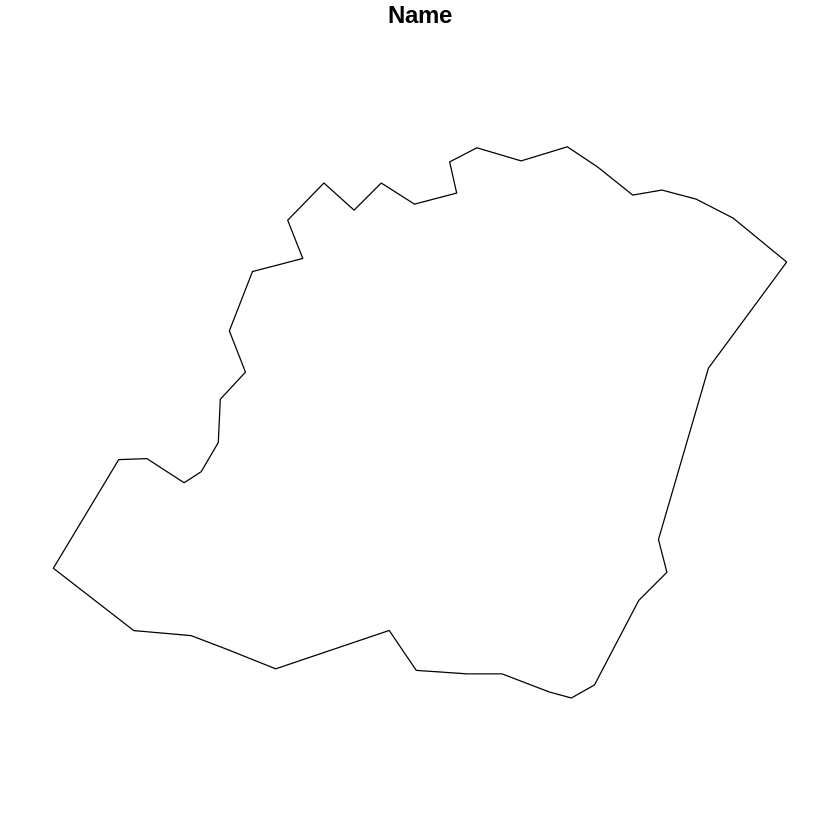

In [63]:
# Load the polygon shapefile
plot1_boundary <- sf::st_read("./data/Plot1_Valid_Cover.shp", quiet = TRUE)
plot(plot1_boundary['Name'])

In [64]:
st_crs(plot1_boundary)

Coordinate Reference System:
  User input: WGS 84 / UTM zone 55S 
  wkt:
PROJCRS["WGS 84 / UTM zone 55S",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 55S",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",147,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False

In [65]:
crs(laz)

Coordinate Reference System:
Deprecated Proj.4 representation:
 +proj=utm +zone=55 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m
+no_defs 
WKT2 2019 representation:
BOUNDCRS[
    SOURCECRS[
        PROJCRS["GDA94 / MGA zone 55",
            BASEGEOGCRS["GDA94",
                DATUM["Geocentric Datum of Australia 1994",
                    ELLIPSOID["GRS 1980",6378137,298.257222101,
                        LENGTHUNIT["metre",1]]],
                PRIMEM["Greenwich",0,
                    ANGLEUNIT["degree",0.0174532925199433]],
                ID["EPSG",4283]],
            CONVERSION["UTM zone 55S",
                METHOD["Transverse Mercator",
                    ID["EPSG",9807]],
                PARAMETER["Latitude of natural origin",0,
                    ANGLEUNIT["degree",0.0174532925199433],
                    ID["EPSG",8801]],
                PARAMETER["Longitude of natural origin",147,
                    ANGLEUNIT["degree",0.0174532925199433],
                    ID["EP

In [68]:
plot1_boundary_reproj <- sf::st_transform(plot1_boundary, crs = crs(laz))

In [69]:
plot1_las <- clip_roi(laz, plot1_boundary_reproj)

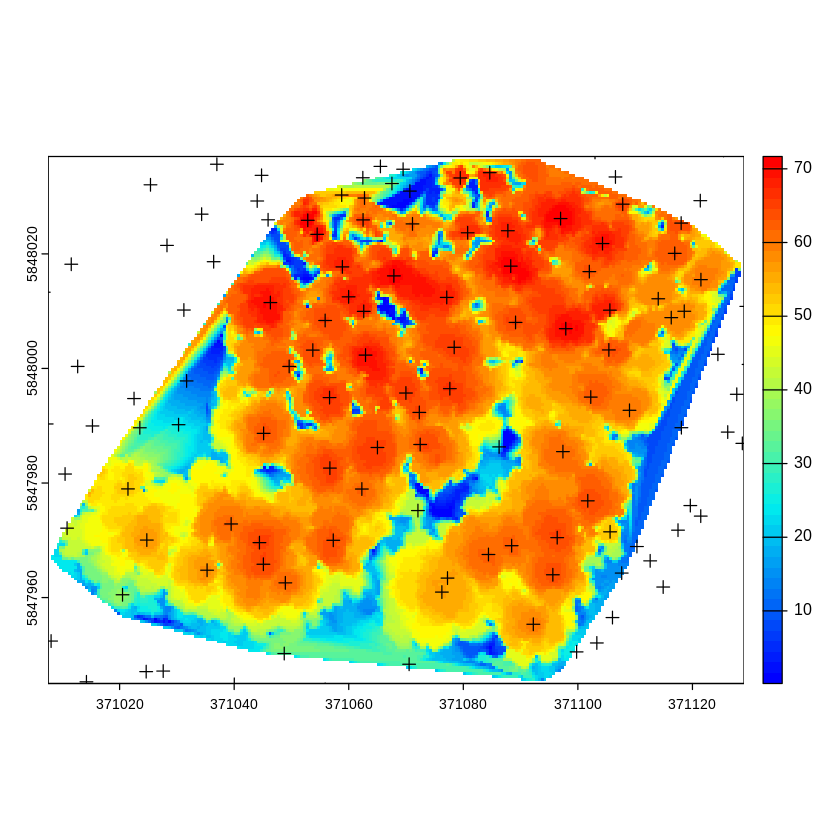

In [70]:
chm_p1 <- rasterize_canopy(plot1_las, 0.5, pitfree(subcircle = 0.2))
ttops_p1_f <- locate_trees(laz, lmf(f))

plot(chm_p1, col = height.colors(50))
plot(sf::st_geometry(ttops_p1_f), add = TRUE, pch = 3)

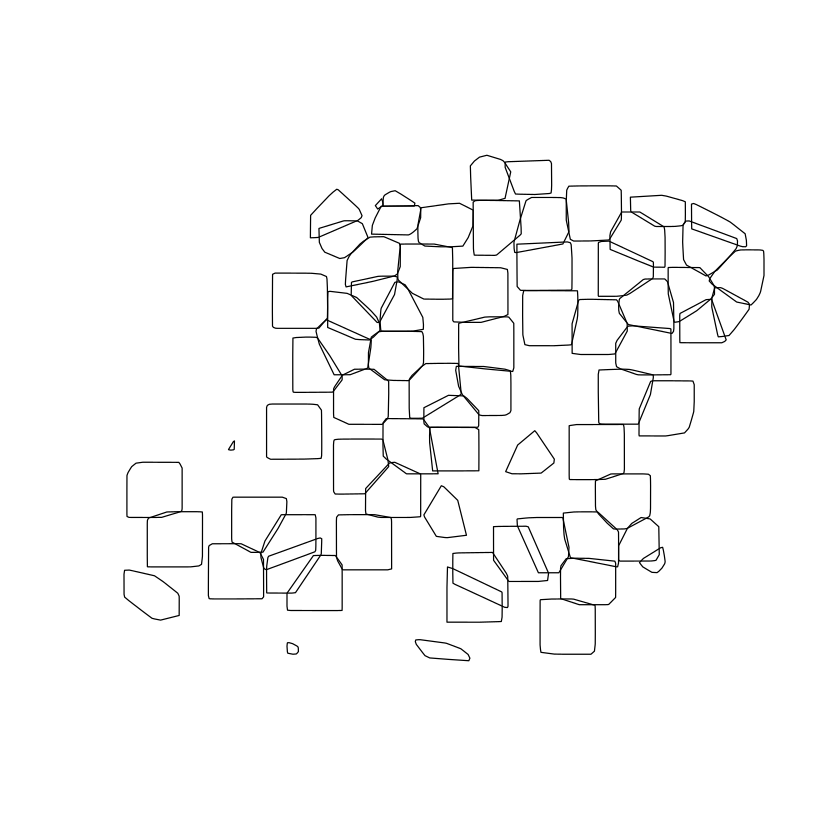

In [75]:
algo <- lidR::dalponte2016(chm_p1, ttops_p1_f)
plot1_trees <- segment_trees(plot1_las, algo, attribute = "IDdalponte")
plot1_crowns <- crown_metrics(plot1_trees, func = NULL, attribute = "IDdalponte",  geom = "convex")#func = .stdtreemetrics,
#plot(crowns["convhull_area"], main = "Crown area (convex hull)")

plot(sf::st_geometry(plot1_crowns), reset = FALSE)

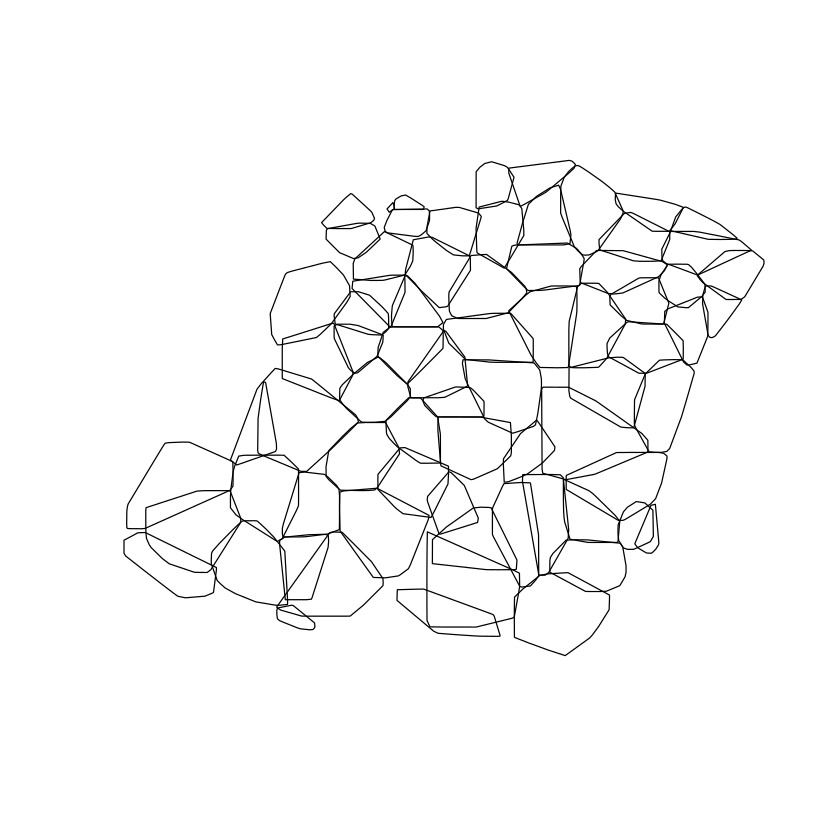

In [77]:
algo <- lidR::dalponte2016(chm_p1, ttops_p1_f,max_cr = 20)
plot1_trees <- segment_trees(plot1_las, algo, attribute = "IDdalponte")
plot1_crowns <- crown_metrics(plot1_trees, func = NULL, attribute = "IDdalponte",  geom = "convex")#func = .stdtreemetrics,
#plot(crowns["convhull_area"], main = "Crown area (convex hull)")

plot(sf::st_geometry(plot1_crowns), reset = FALSE)

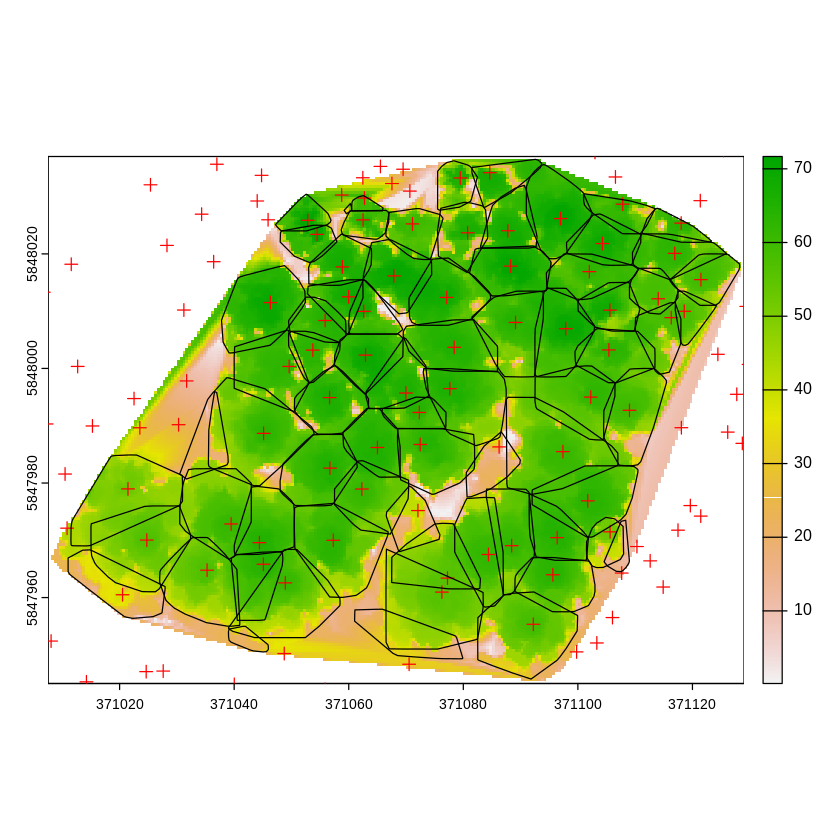

In [78]:
plot(chm_p1)#, col = height.colors(50)
plot(sf::st_geometry(ttops_p1_f), add = TRUE, pch = 3,col='red')
plot(sf::st_geometry(plot1_crowns), add = TRUE, reset = FALSE)